# Tabular Playground Series - Jan 2021 ([link](https://www.kaggle.com/competitions/tabular-playground-series-jan-2021/overview))

Kaggle performance of different improvement iterations:
|Iteration | Kaggle result|
|---|---|
|Linear regression | 0.72705|
|Trying to fix bimodality in target value | 0.93523|
|Random forest | 0.72876|
|Histogram gradient boosting trees (hgbt) | 0.70223|
|Grid search on hgbt | 0.70218|


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.feature_selection import f_regression

In [2]:
df = pd.read_csv('train.csv', index_col=0)

### First data assessment

- 14 continuous features, all between -0.3 and 1.2
- A continuous target value
- 300000 entries
- No missing values

In [4]:
df.head(3)

cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
id                                                                         
1   0.670390  0.811300  0.643968  0.291791  0.284117  0.855953  0.890700   
3   0.388053  0.621104  0.686102  0.501149  0.643790  0.449805  0.510824   
4   0.834950  0.227436  0.301584  0.293408  0.606839  0.829175  0.506143   

       cont8     cont9    cont10    cont11    cont12    cont13    cont14  \
id                                                                         
1   0.285542  0.558245  0.779418  0.921832  0.866772  0.878733  0.305411   
3   0.580748  0.418335  0.432632  0.439872  0.434971  0.369957  0.369484   
4   0.558771  0.587603  0.823312  0.567007  0.677708  0.882938  0.303047   

      target  
id            
1   7.243043  
3   8.203331  
4   7.776091

In [3]:
df.describe()

cont1          cont2          cont3          cont4  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.506873       0.497898       0.521557       0.515683   
std         0.203976       0.228159       0.200770       0.233035   
min        -0.082263      -0.031397       0.020967       0.152761   
25%         0.343078       0.319170       0.344096       0.294935   
50%         0.484005       0.553209       0.551471       0.482880   
75%         0.643789       0.731263       0.648315       0.748705   
max         1.016227       0.859697       1.006955       1.010402   

               cont5          cont6          cont7          cont8  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.502022       0.526515       0.487890       0.525163   
std         0.220701       0.217909       0.181096       0.216221   
min         0.276377       0.066166      -0.097666       0.217260   
25%         0.284108       0.356163       0.346600       0.341486   
50%         0.451733       0.470988       0.466825       0.483460   
75%         0.670660       0.694043       0.581292       0.685250   
max         1.034261       1.043858       1.066167       1.024427   

               cont9         cont10         cont11         cont12  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.459857       0.520532       0.483926       0.506877   
std         0.196685       0.201854       0.220082       0.218947   
min        -0.240604      -0.085046       0.083277       0.088635   
25%         0.330832       0.375465       0.300474       0.310166   
50%         0.416843       0.458877       0.441916       0.486599   
75%         0.575041       0.700292       0.679128       0.694453   
max         1.004114       1.199951       1.022620       1.049025   

              cont13         cont14         target  
count  300000.000000  300000.000000  300000.000000  
mean        0.553442       0.503713       7.905661  
std         0.229730       0.208238       0.733071  
min         0.029950       0.166367       0.000000  
25%         0.350472       0.308673       7.329367  
50%         0.487707       0.431845       7.940571  
75%         0.768479       0.712653       8.470084  
max         0.977845       0.868506      10.267569

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 1 to 499999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cont1   300000 non-null  float64
 1   cont2   300000 non-null  float64
 2   cont3   300000 non-null  float64
 3   cont4   300000 non-null  float64
 4   cont5   300000 non-null  float64
 5   cont6   300000 non-null  float64
 6   cont7   300000 non-null  float64
 7   cont8   300000 non-null  float64
 8   cont9   300000 non-null  float64
 9   cont10  300000 non-null  float64
 10  cont11  300000 non-null  float64
 11  cont12  300000 non-null  float64
 12  cont13  300000 non-null  float64
 13  cont14  300000 non-null  float64
 14  target  300000 non-null  float64
dtypes: float64(15)
memory usage: 36.6 MB


### Train test split

In [5]:
target_list = ['target']
feature_list = df.columns.drop(target_list).to_list()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[feature_list], df[target_list], test_size=0.3, random_state=21)

### Pair plot

- No clear correlation visible for specific input-target combinations; 'horizontal shape of the plots'
- `cont2` almost looks like a categorical feature for a sub range
- Few features, show correlations vs other features, e.g. `cont6`
- Some features hardly show correlation with other features, e.g. `cont14`
- No histogram shows a nice bell shape, most of them look bi-/multimodal

/home/luukvanroessel/miniconda3/envs/ml-luuk/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/luukvanroessel/miniconda3/envs/ml-luuk/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/luukvanroessel/miniconda3/envs/ml-luuk/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/luukvanroessel/miniconda3/envs/ml-luuk/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWar

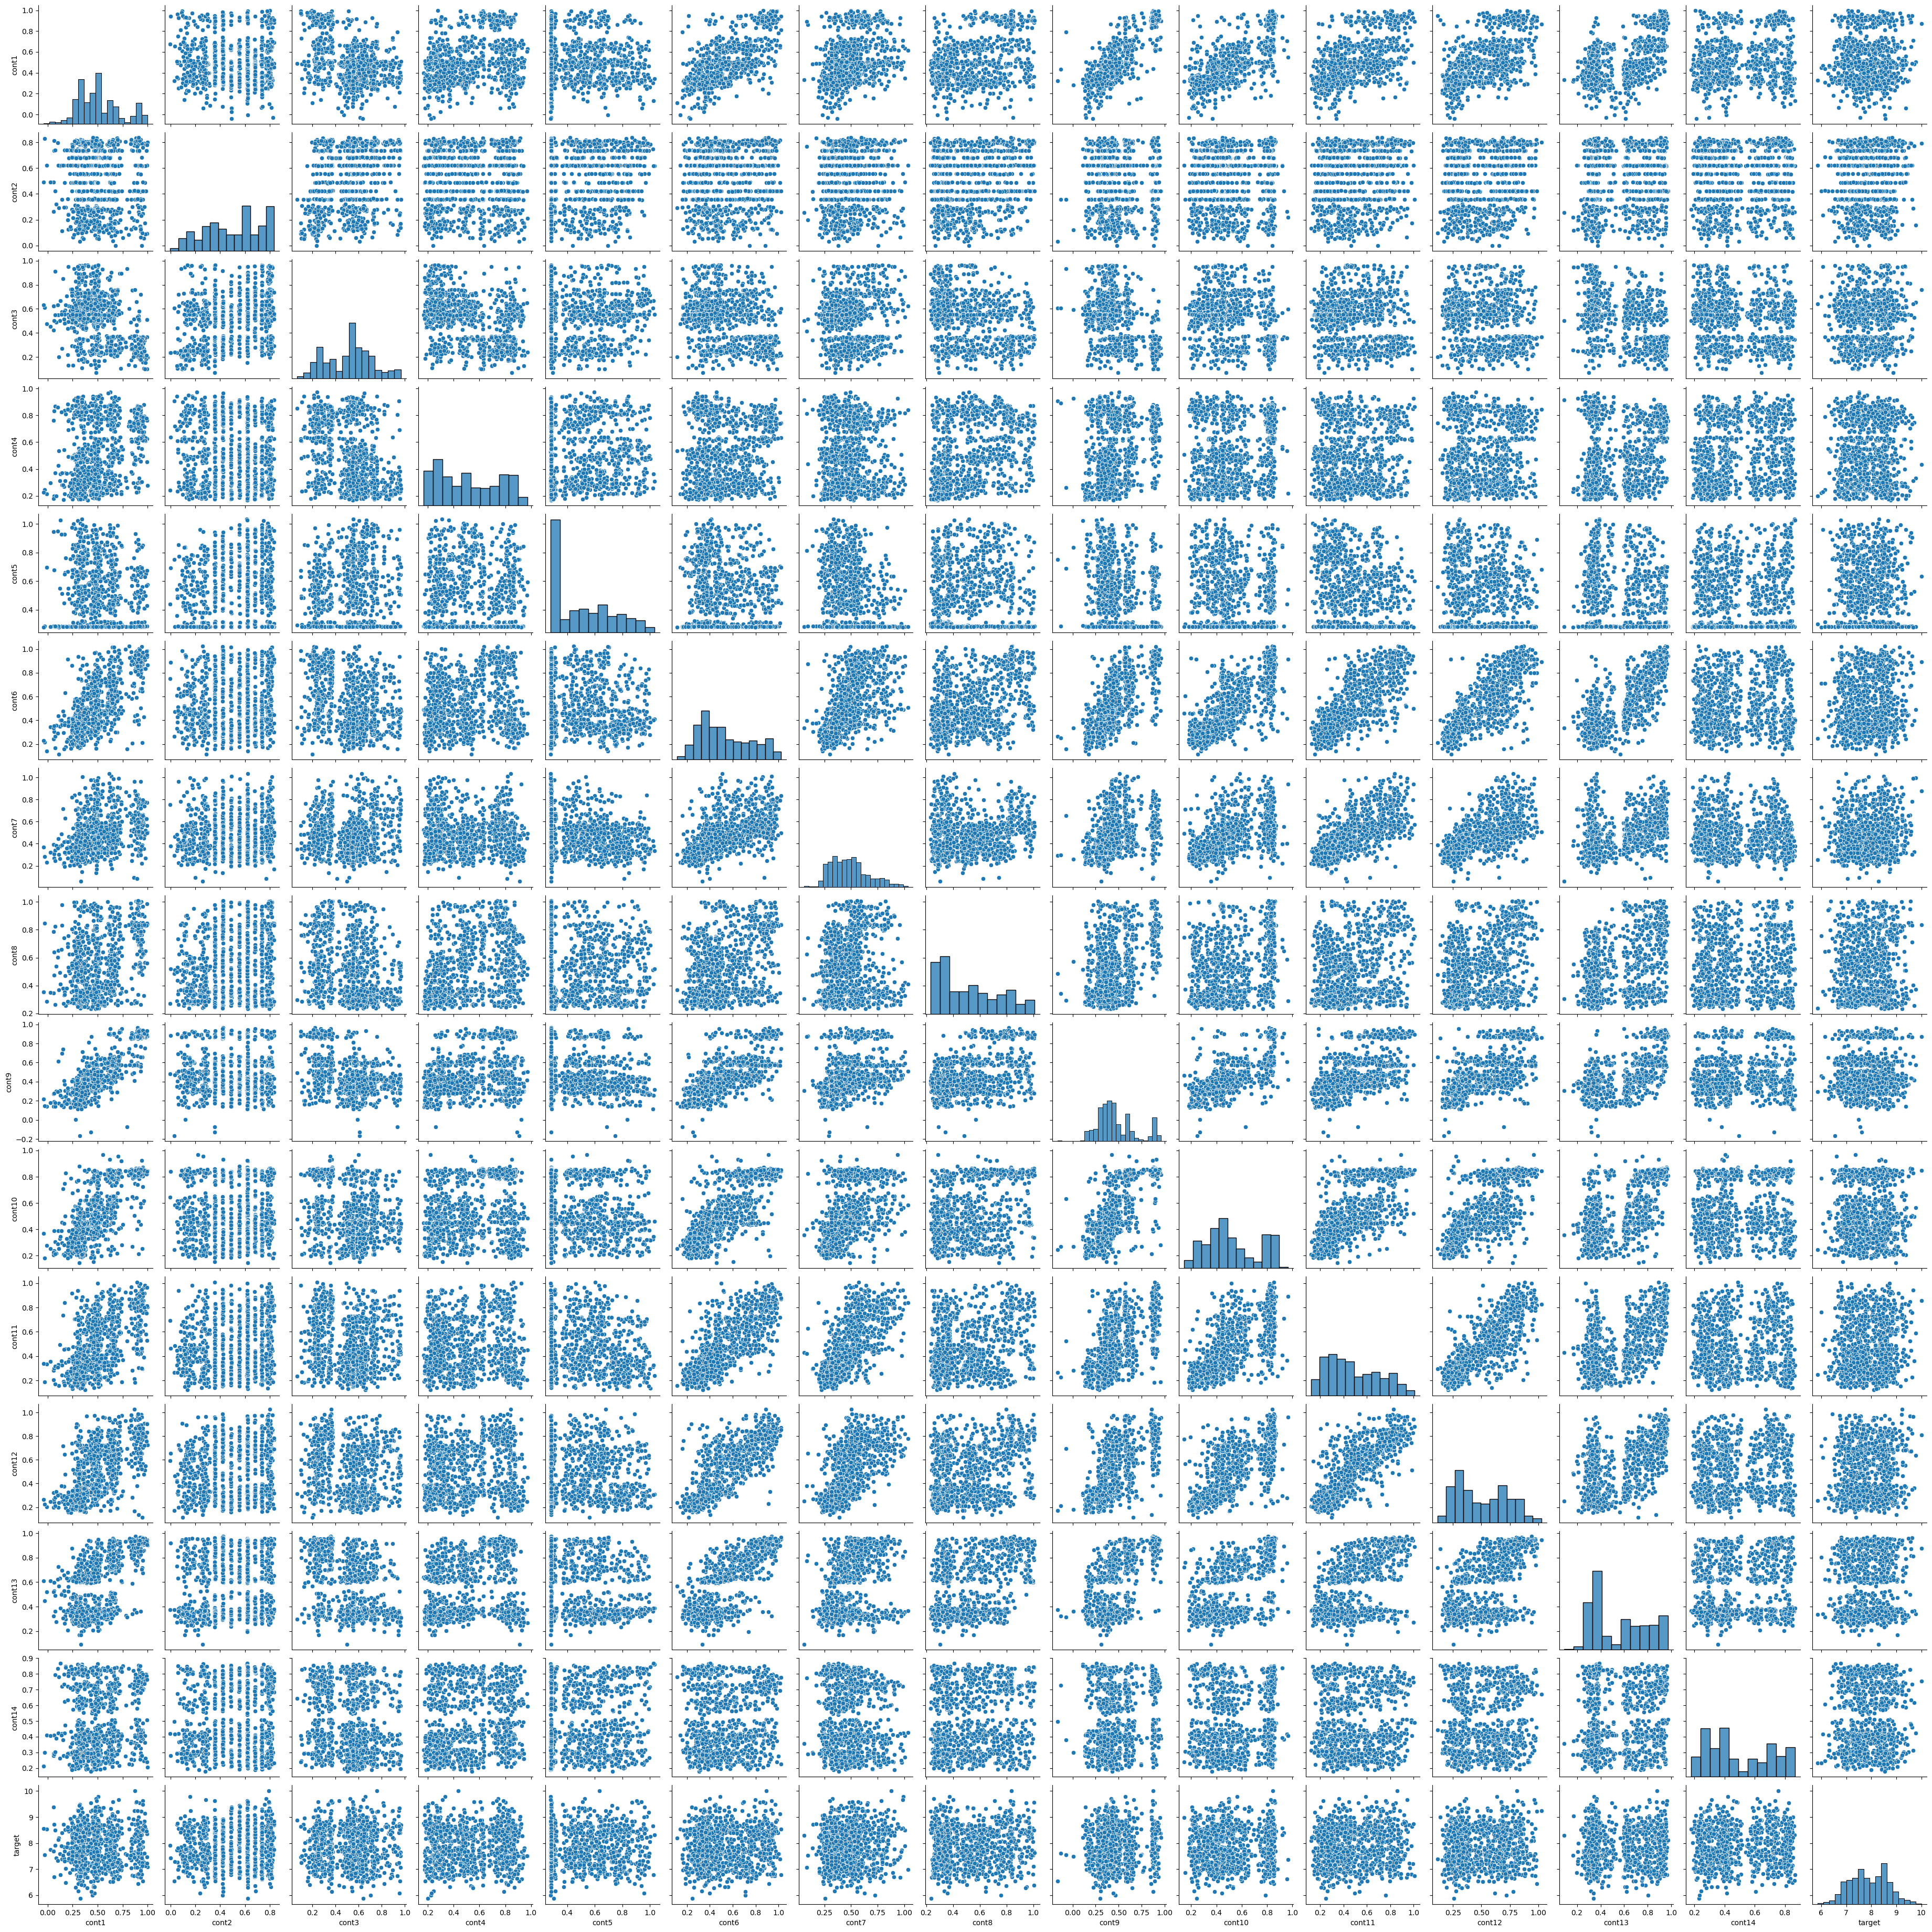

In [9]:
sns.pairplot(df[feature_list + ["target"]].sample(1000))

According to the plot below, we have some outliers in our target data, given that the plot includes 0 on the x-axis

/home/luukvanroessel/miniconda3/envs/ml-luuk/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Count'>

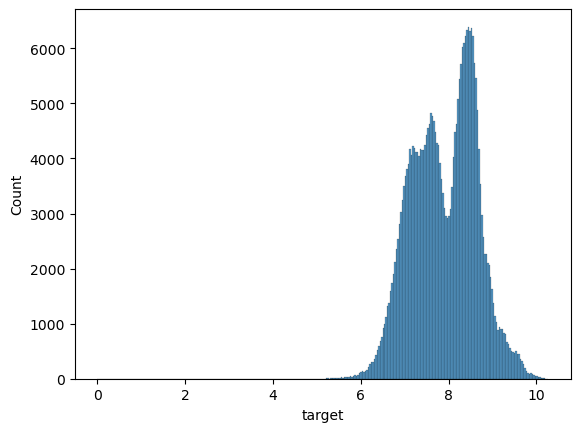

In [8]:
sns.histplot(df.target)

### Create a baseline

- Select the average as the predicted result

In [10]:
# get the cross validated result when we always predict the mean
mse_mean = mean_squared_error(y_train, np.full_like(y_train, y_train.mean()))
r2_mean = r2_score(y_train, np.full_like(y_train, y_train.mean()))

print(f"Mean squared error: {mse_mean:.2}")
print(f"R2-score: {r2_mean:.2}, which is a {r2_mean:.2}% reduction in residuals compared to the uniform average")

Mean squared error: 0.54
R2-score: 0.0, which is a 0.0% reduction in residuals compared to the uniform average


### Try to improve using multiple linear regression

result: we se a very minimal improvement compared to estimating using the mean

In [11]:
def get_cv_results(model, X, y, print_results=True, cv=10):
    
    scoring = {'MSE': make_scorer(mean_squared_error), 'R²': make_scorer(r2_score)}
    # Calculate cross-validated mean squared error and r2-score
    cv_results = cross_validate(model, X, y, scoring=scoring, cv=cv)
    
    cv_mse = cv_results['test_MSE'].mean()
    cv_r2 = cv_results['test_R²'].mean()

    if print_results:
        print(f"{model} cv mean squared error: {cv_mse:.2}")
        print(f"{model} cv r2-score: {cv_r2:.2}, which is a {cv_r2:.2}% reduction in residuals compared to the uniform average")
    return cv_mse, cv_r2

In [12]:
reg = LinearRegression().fit(X_train[feature_list], y_train)
y_pred = reg.predict(X_test[feature_list]) #later used for residual analysis
mse_baseline, r2_baseline = get_cv_results(reg, X_train[feature_list], y_train)

LinearRegression() cv mean squared error: 0.53
LinearRegression() cv r2-score: 0.018, which is a 0.018% reduction in residuals compared to the uniform average


### Potential improvements

- Check outliers
- Inspect residuals
- Feature selection: forward/backward/mixed selection
- Use decision trees
- Data transformation - ensuring a bell shaped distribution

### Checking outliers per feature

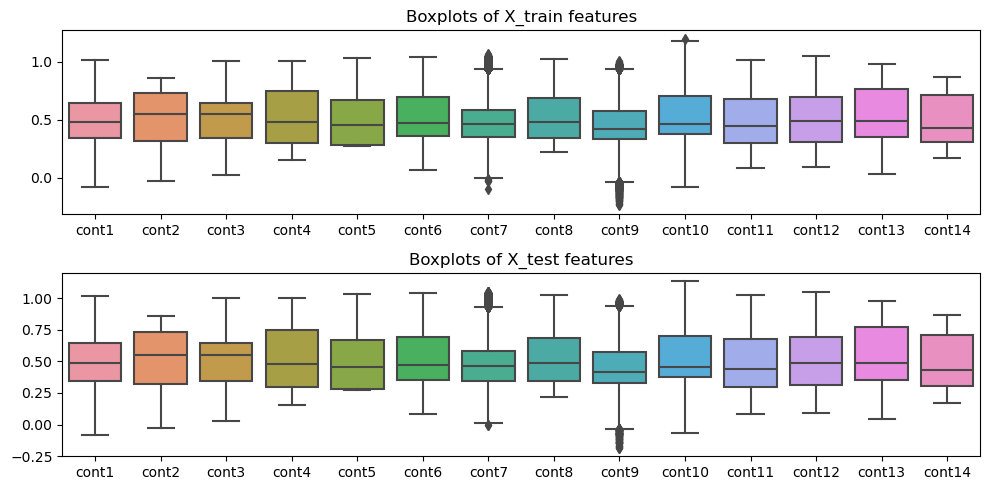

In [13]:
fig, ax = plt.subplots(2, 1, figsize = (10, 5))
sns.boxplot(data=X_train, ax = ax[0])
sns.boxplot(data=X_test, ax = ax[1])
ax[0].set_title('Boxplots of X_train features')
ax[1].set_title('Boxplots of X_test features')
plt.tight_layout()


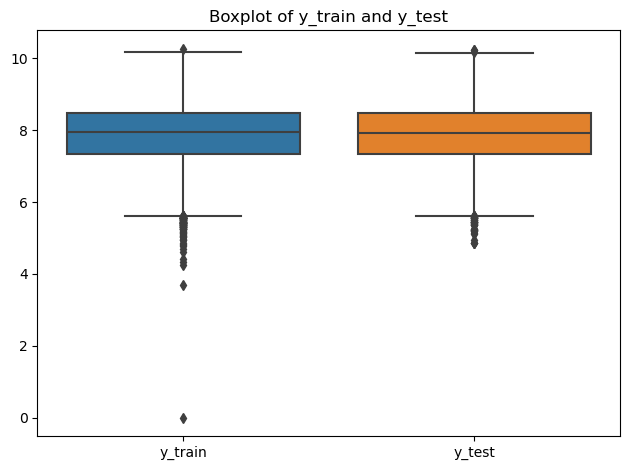

In [14]:
fig, ax = plt.subplots(1, 1)

sns.boxplot(pd.concat([y_train.rename(columns={'target': 'y_train'}), y_test.rename(columns={'target': 'y_test'})], axis=1))
plt.title('Boxplot of y_train and y_test')
plt.tight_layout()

Clipping the outliers doesn't seem to have an effect

In [17]:
def replace_outliers(df):
    """Clip outliers to the 1.5*IQR range"""
    for col in df.columns:
        Q1 = df.loc[:, col].quantile(0.25)
        Q3 = df.loc[:, col].quantile(0.75)
        IQR = Q3 - Q1
        df.loc[:, col] = df.loc[:, col].clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
    return df

In [18]:
X_train_no_outliers = replace_outliers(X_train.copy())
X_test_no_outliers = replace_outliers(X_test.copy())

reg_no_outliers = LinearRegression().fit(X_train_no_outliers, y_train)
y_pred_no_outliers = reg_no_outliers.predict(X_test_no_outliers)
mse_no_outliers, r2_no_outliers = get_cv_results(reg_no_outliers, X_train_no_outliers, y_train)

LinearRegression() cv mean squared error: 0.53
LinearRegression() cv r2-score: 0.018, which is a 0.018% reduction in residuals compared to the uniform average


### Residual plot

- (variance of the) Residuals remain somewhat constant over the fitted value range
- However, it looks like there are two 'residual clusters' (bimodal).
- checkout
    - https://stats.stackexchange.com/questions/569065/dealing-with-bimodal-residuals
    - https://timeseriesreasoning.com/contents/multi-modal-residual-errors/
- Both links resolve the issue of bimodal residuals by including extra features in the model. Unfortunately, there are no extra features available in our case.

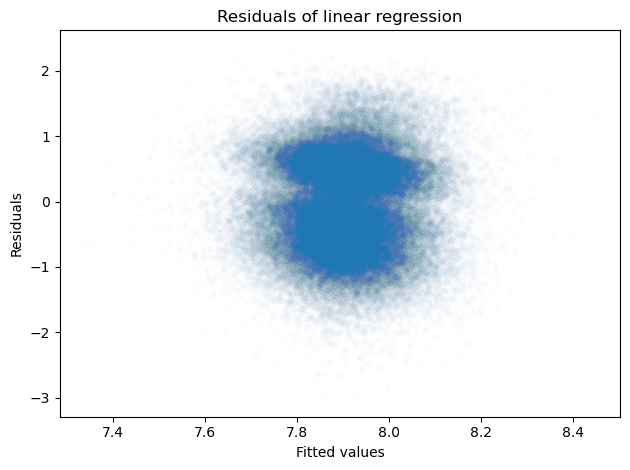

In [16]:
residuals_lin_reg_all = y_test - y_pred

fig, ax = plt.subplots()
ax.scatter(x = y_pred, y = residuals_lin_reg_all, alpha = 0.01, s= 10)
ax.set_title('Residuals of linear regression')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')

plt.tight_layout()

array([[<Axes: title={'center': 'target'}>]], dtype=object)

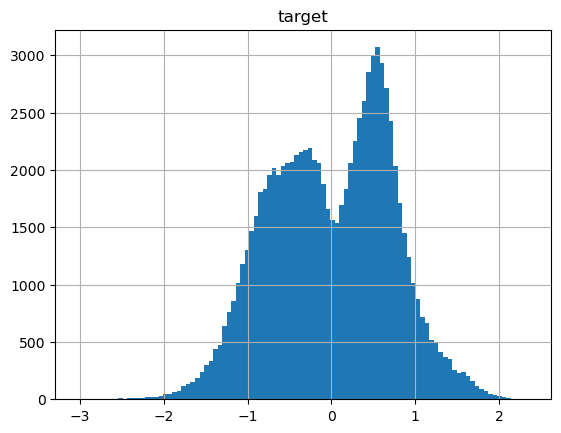

In [17]:
residuals_lin_reg_all.hist(bins = 100)

## Experiment: Playing with binary category

- One approach could be to train a model that can predict to what cluster an observation belongs and extract the 'missing feature' this way.

In [20]:
y_pred_train = reg.predict(X_train)

residuals_lin_reg_all_train = y_train - y_pred_train

X_train['posi_resi'] = 0
X_train['residual'] = residuals_lin_reg_all_train
X_train.loc[X_train['residual'] > 0, 'posi_resi'] = 1

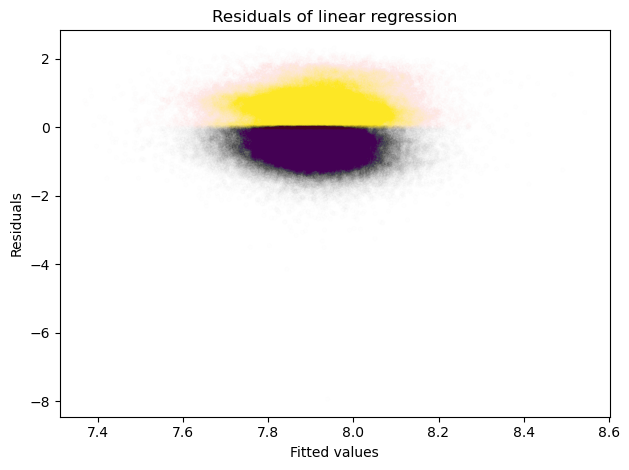

In [21]:
fig, ax = plt.subplots()
ax.scatter(x = y_pred_train, y = residuals_lin_reg_all_train, alpha = 0.005, s= 10, c=X_train['posi_resi'].values)
ax.set_title('Residuals of linear regression')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')

plt.tight_layout()

Unfortunately, the model is not able to correctly predict whether a combination of features result in a positive residual or negative residual. Somehow there is a horizontal separtion visible. I expect to model to get worse

/home/luukvanroessel/miniconda3/envs/ml-luuk/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


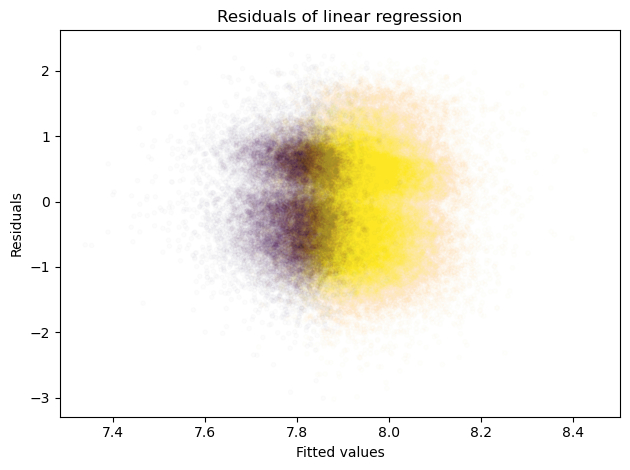

In [22]:
resid_clf = LogisticRegression()
resid_clf.fit(X_train.drop(columns=['posi_resi', 'residual']).values, X_train['posi_resi'].values)
X_test['posi_resi'] = resid_clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(x = y_pred, y = residuals_lin_reg_all, alpha = 0.01, s= 10, c=X_test['posi_resi'].values)
ax.set_title('Residuals of linear regression')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')

plt.tight_layout()

Indeed the model became worse

In [23]:
reg_resid = LinearRegression().fit(X_train.drop(columns='residual'), y_train)
y_pred_resid = reg_resid.predict(X_test)

mse_resid = mean_squared_error(y_test, y_pred_resid)
r2_resid = r2_score(y_test, y_pred_resid)

print(f"Mean squared error: {mse_resid:.2}")
print(f"R2-score: {r2_resid:.2}, which is a {r2_resid:.2}% reduction in residuals compared to the uniform average")

Mean squared error: 0.87
R2-score: -0.63, which is a -0.63% reduction in residuals compared to the uniform average


### Random forrest
How is it possible that MSE remained the same and r-squared got worse compared to the linear regression model? 0.18 --> 0.14. Is this because of the randomization?

In [36]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train[feature_list], y_train)
y_pred_regr = regr.predict(X_test[feature_list])
mse_regr, r2_regr = get_cv_results(regr, X_train[feature_list], y_train)

/home/luukvanroessel/miniconda3/envs/ml-luuk/lib/python3.12/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/luukvanroessel/miniconda3/envs/ml-luuk/lib/python3.12/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/luukvanroessel/miniconda3/envs/ml-luuk/lib/python3.12/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/luukvanroessel/miniconda3/envs/ml-luuk/lib/python3.12/site-packages/sklearn/base.py:1151: DataCon

RandomForestRegressor(max_depth=2, random_state=0) cv mean squared error: 0.53
RandomForestRegressor(max_depth=2, random_state=0) cv r2-score: 0.014, which is a 0.014% reduction in residuals compared to the uniform average


### Apply backward selection 

Our predictions get worse when we drop more features

/tmp/ipykernel_18528/1962121767.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  backward_results_df = pd.concat([backward_results_df, pd.DataFrame({'features': [backward_selection_list.copy()], 'mse': mse, 'r2': r2}, index = [i])])


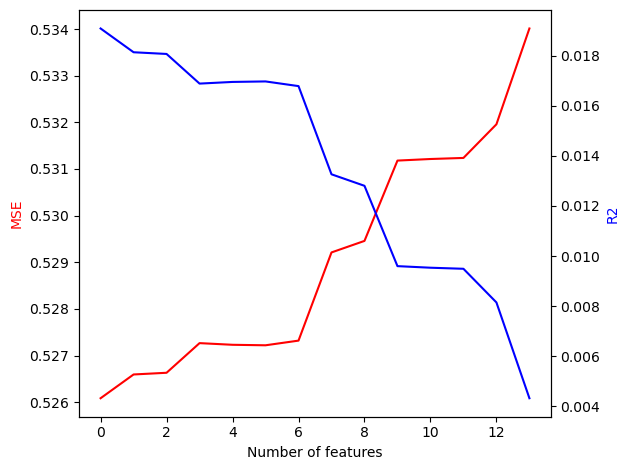

In [37]:
backward_results_df = pd.DataFrame(columns=['features', 'mse', 'r2'])

backward_selection_list = feature_list.copy()

for i in range(len(feature_list)):
    X_train_backward = X_train[backward_selection_list]
    X_test_backward = X_test[backward_selection_list]
    reg = LinearRegression().fit(X_train_backward, y_train)
    y_pred = reg.predict(X_test_backward)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    scores, p_values = f_regression(X_train_backward, y_train.values.ravel())
    backward_results_df = pd.concat([backward_results_df, pd.DataFrame({'features': [backward_selection_list.copy()], 'mse': mse, 'r2': r2}, index = [i])])
    least_significant_feature = backward_selection_list[p_values.argmax()]
    backward_selection_list.remove(least_significant_feature)

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(backward_results_df.index, backward_results_df.mse, label='MSE', color='r')
ax2.plot(backward_results_df.index, backward_results_df.r2, label='R2', color='b')
ax.set_xlabel('Number of features')
ax.set_ylabel('MSE', color='r')
ax2.set_ylabel('R2', color='b')
plt.tight_layout()

### Histogram Gradient Boosting Trees ([example](https://scikit-learn.org/stable/auto_examples/ensemble/plot_hgbt_regression.html#sphx-glr-auto-examples-ensemble-plot-hgbt-regression-py))

This improves our result!

In [23]:
max_iter = 500
hgbt = HistGradientBoostingRegressor(max_iter=max_iter, random_state=21)

mse_baseline, r2_baseline = get_cv_results(hgbt, X_train[feature_list], y_train.values.ravel())

HistGradientBoostingRegressor(max_iter=500, random_state=21) cv mean squared error: 0.49
HistGradientBoostingRegressor(max_iter=500, random_state=21) cv r2-score: 0.083, which is a 0.083% reduction in residuals compared to the uniform average


### Grid search on Histogram Gradient Boosting Trees arguments

Not too much improvement

In [ ]:
# Use sklearns GridSearchCV to find the best combination of max_iter, max_leaf_nodes and learning_rate

from sklearn.model_selection import GridSearchCV

param_grid = {'max_iter': [200, 300, 400, 500], 'max_leaf_nodes': [10, 20, 30, 45], 'learning_rate': [0.01, 0.1, 0.5, 1]}
hgbt_gs = HistGradientBoostingRegressor(random_state=21)
grid_search = GridSearchCV(hgbt_gs, param_grid, cv=7, scoring='neg_mean_squared_error')
grid_search.fit(X_train[feature_list], y_train.values.ravel())

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best MSE: {grid_search.best_score_}")


In [42]:
hgbt_gs = HistGradientBoostingRegressor(max_iter=grid_search.best_params_['max_iter'], max_leaf_nodes=grid_search.best_params_['max_leaf_nodes'], learning_rate=grid_search.best_params_['learning_rate'], random_state=21)
mse_hgbt_gs, r2_hgbt_gs = get_cv_results(hgbt_gs, X_train[feature_list], y_train.values.ravel())

HistGradientBoostingRegressor(max_iter=200, max_leaf_nodes=45, random_state=21) cv mean squared error: 0.49
HistGradientBoostingRegressor(max_iter=200, max_leaf_nodes=45, random_state=21) cv r2-score: 0.084, which is a 0.084% reduction in residuals compared to the uniform average
